#**Network Slicing using Supervised Learning**

**We will use Data Imputation for the Test Data to evalute model for a range of unknown data with new patterns.**

In [1]:
# Random Seed for Under-sampling, Data-split and Modeling
import random
#Under-sampling
# a = random.randint(10, 99)
a = 42

# Data-split labelled and unlabelled
# b1 = random.randint(10, 99)
b1 = 42

#Data-split train and test
b2 = 42

#Data Modeling
# c = 42

#Data-split labelled and unlabelled
# Z = 0.001

undersampling = 'yes'
tsne = 'yes'

In [2]:
a

42

In [3]:
b1

42

# **Data Pre-processing**

### **Import Libraries**

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, label_binarize
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, silhouette_samples, silhouette_score, adjusted_rand_score, accuracy_score, precision_score, recall_score, f1_score, precision_recall_curve, average_precision_score, roc_curve, roc_auc_score, auc
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.manifold import TSNE
from sklearn.model_selection import GridSearchCV

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from pandas.plotting import parallel_coordinates
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.patches import Rectangle, Circle, Ellipse, Polygon, Wedge, Arrow

import numpy as np
import pandas as pd
import random
import time

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
start_time_data_preprocessing = time.time()

### **Load Dataset**

In [7]:
# data = pd.read_csv('/content/drive/MyDrive/Dataset/train_dataset.zip')
data = pd.read_csv('/content/drive/MyDrive/Dataset/deepslice_data.csv.zip')
data

,Unnamed: 0,Use Case,LTE/5g Category,Technology Supported,Day,Time,GBR,Packet Loss Rate,Packet delay,slice Type
0,1,Smartphone,1,LTE/5G,sunday,1,Non-GBR,0.010000,100,eMBB
1,2,Smartphone,1,LTE/5G,sunday,2,Non-GBR,0.010000,100,eMBB
2,3,Smartphone,1,LTE/5G,sunday,3,Non-GBR,0.010000,100,eMBB
3,4,Smartphone,1,LTE/5G,sunday,4,Non-GBR,0.010000,100,eMBB
4,5,Smartphone,1,LTE/5G,sunday,5,Non-GBR,0.010000,100,eMBB
...,...,...,...,...,...,...,...,...,...,...
63162,63163,Smart Transportation,22,"IoT(LTE-M, NB-IoT)",saturday,19,Non-GBR,0.000001,10,URLLC
63163,63164,Smart Transportation,22,"IoT(LTE-M, NB-IoT)",saturday,20,Non-GBR,0.000001,10,URLLC
63164,63165,Smart Transportation,22,"IoT(LTE-M, NB-IoT)",saturday,21,Non-GBR,0.000001,10,URLLC
63165,63166,Smart Transportation,22,"IoT(LTE-M, NB-IoT)",saturday,22,Non-GBR,0.000001,10,URLLC


In [8]:
data_backup = data
data_backup

,Unnamed: 0,Use Case,LTE/5g Category,Technology Supported,Day,Time,GBR,Packet Loss Rate,Packet delay,slice Type
0,1,Smartphone,1,LTE/5G,sunday,1,Non-GBR,0.010000,100,eMBB
1,2,Smartphone,1,LTE/5G,sunday,2,Non-GBR,0.010000,100,eMBB
2,3,Smartphone,1,LTE/5G,sunday,3,Non-GBR,0.010000,100,eMBB
3,4,Smartphone,1,LTE/5G,sunday,4,Non-GBR,0.010000,100,eMBB
4,5,Smartphone,1,LTE/5G,sunday,5,Non-GBR,0.010000,100,eMBB
...,...,...,...,...,...,...,...,...,...,...
63162,63163,Smart Transportation,22,"IoT(LTE-M, NB-IoT)",saturday,19,Non-GBR,0.000001,10,URLLC
63163,63164,Smart Transportation,22,"IoT(LTE-M, NB-IoT)",saturday,20,Non-GBR,0.000001,10,URLLC
63164,63165,Smart Transportation,22,"IoT(LTE-M, NB-IoT)",saturday,21,Non-GBR,0.000001,10,URLLC
63165,63166,Smart Transportation,22,"IoT(LTE-M, NB-IoT)",saturday,22,Non-GBR,0.000001,10,URLLC


In [9]:
data.columns.tolist()

['Unnamed: 0',
 'Use Case',
 'LTE/5g Category',
 'Technology Supported',
 'Day',
 'Time',
 'GBR',
 'Packet Loss Rate',
 'Packet delay',
 'slice Type']

In [10]:
data['LTE/5g Category'].value_counts()

,count
LTE/5g Category,
2,3024
3,3024
5,3024
4,3024
6,3024
7,3024
15,3024
8,3024
9,3024


In [11]:
data['Technology Supported'].value_counts()

,count
Technology Supported,
LTE/5G,33599
"IoT(LTE-M, NB-IoT)",29568


In [12]:
data = data.drop(data.columns[0], axis=1)
data

,Use Case,LTE/5g Category,Technology Supported,Day,Time,GBR,Packet Loss Rate,Packet delay,slice Type
0,Smartphone,1,LTE/5G,sunday,1,Non-GBR,0.010000,100,eMBB
1,Smartphone,1,LTE/5G,sunday,2,Non-GBR,0.010000,100,eMBB
2,Smartphone,1,LTE/5G,sunday,3,Non-GBR,0.010000,100,eMBB
3,Smartphone,1,LTE/5G,sunday,4,Non-GBR,0.010000,100,eMBB
4,Smartphone,1,LTE/5G,sunday,5,Non-GBR,0.010000,100,eMBB
...,...,...,...,...,...,...,...,...,...
63162,Smart Transportation,22,"IoT(LTE-M, NB-IoT)",saturday,19,Non-GBR,0.000001,10,URLLC
63163,Smart Transportation,22,"IoT(LTE-M, NB-IoT)",saturday,20,Non-GBR,0.000001,10,URLLC
63164,Smart Transportation,22,"IoT(LTE-M, NB-IoT)",saturday,21,Non-GBR,0.000001,10,URLLC
63165,Smart Transportation,22,"IoT(LTE-M, NB-IoT)",saturday,22,Non-GBR,0.000001,10,URLLC


In [13]:
data = data.drop(['LTE/5g Category','Day','Time'], axis=1)
data

,Use Case,Technology Supported,GBR,Packet Loss Rate,Packet delay,slice Type
0,Smartphone,LTE/5G,Non-GBR,0.010000,100,eMBB
1,Smartphone,LTE/5G,Non-GBR,0.010000,100,eMBB
2,Smartphone,LTE/5G,Non-GBR,0.010000,100,eMBB
3,Smartphone,LTE/5G,Non-GBR,0.010000,100,eMBB
4,Smartphone,LTE/5G,Non-GBR,0.010000,100,eMBB
...,...,...,...,...,...,...
63162,Smart Transportation,"IoT(LTE-M, NB-IoT)",Non-GBR,0.000001,10,URLLC
63163,Smart Transportation,"IoT(LTE-M, NB-IoT)",Non-GBR,0.000001,10,URLLC
63164,Smart Transportation,"IoT(LTE-M, NB-IoT)",Non-GBR,0.000001,10,URLLC
63165,Smart Transportation,"IoT(LTE-M, NB-IoT)",Non-GBR,0.000001,10,URLLC


### **Data Distribution by "Use Case"**

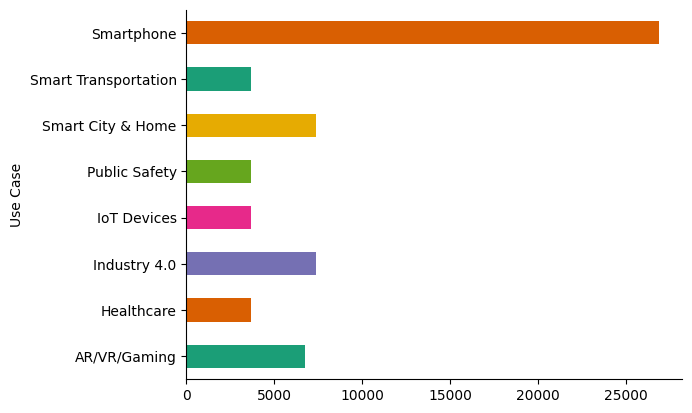

In [14]:
from matplotlib import pyplot as plt
import seaborn as sns
data.groupby('Use Case').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

### **Conversion of Feature Columns (Categorial to Numerical)**

using one-hot encoding

In [15]:
one_hot_encoded_data = pd.get_dummies(data, columns = ['Use Case', 'Technology Supported', 'GBR'])
one_hot_encoded_data

,Packet Loss Rate,Packet delay,slice Type,Use Case_AR/VR/Gaming,Use Case_Healthcare,Use Case_Industry 4.0,Use Case_IoT Devices,Use Case_Public Safety,Use Case_Smart City & Home,Use Case_Smart Transportation,Use Case_Smartphone,"Technology Supported_IoT(LTE-M, NB-IoT)",Technology Supported_LTE/5G,GBR_GBR,GBR_Non-GBR
0,0.010000,100,eMBB,False,False,False,False,False,False,False,True,False,True,False,True
1,0.010000,100,eMBB,False,False,False,False,False,False,False,True,False,True,False,True
2,0.010000,100,eMBB,False,False,False,False,False,False,False,True,False,True,False,True
3,0.010000,100,eMBB,False,False,False,False,False,False,False,True,False,True,False,True
4,0.010000,100,eMBB,False,False,False,False,False,False,False,True,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63162,0.000001,10,URLLC,False,False,False,False,False,False,True,False,True,False,False,True
63163,0.000001,10,URLLC,False,False,False,False,False,False,True,False,True,False,False,True
63164,0.000001,10,URLLC,False,False,False,False,False,False,True,False,True,False,False,True
63165,0.000001,10,URLLC,False,False,False,False,False,False,True,False,True,False,False,True


In [16]:
data_ohe = one_hot_encoded_data.rename(columns={'Use Case_AR/VR/Gaming':'AR/VR/Gaming','Use Case_Healthcare':'Healthcare','Use Case_Industry 4.0':'Industry 4.0','Use Case_IoT Devices':'IoT Devices','Use Case_Public Safety':'Public Safety','Use Case_Smart City & Home':'Smart City & Home','Use Case_Smart Transportation':'Smart Transportation','Use Case_Smartphone':'Smartphone','Technology Supported_IoT(LTE-M, NB-IoT)':'IoT','Technology Supported_LTE/5G':'LTE/5G','GBR_GBR':'GBR','GBR_Non-GBR':'Non-GBR'})
data_ohe

,Packet Loss Rate,Packet delay,slice Type,AR/VR/Gaming,Healthcare,Industry 4.0,IoT Devices,Public Safety,Smart City & Home,Smart Transportation,Smartphone,IoT,LTE/5G,GBR,Non-GBR
0,0.010000,100,eMBB,False,False,False,False,False,False,False,True,False,True,False,True
1,0.010000,100,eMBB,False,False,False,False,False,False,False,True,False,True,False,True
2,0.010000,100,eMBB,False,False,False,False,False,False,False,True,False,True,False,True
3,0.010000,100,eMBB,False,False,False,False,False,False,False,True,False,True,False,True
4,0.010000,100,eMBB,False,False,False,False,False,False,False,True,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63162,0.000001,10,URLLC,False,False,False,False,False,False,True,False,True,False,False,True
63163,0.000001,10,URLLC,False,False,False,False,False,False,True,False,True,False,False,True
63164,0.000001,10,URLLC,False,False,False,False,False,False,True,False,True,False,False,True
63165,0.000001,10,URLLC,False,False,False,False,False,False,True,False,True,False,False,True


In [17]:
data = data_ohe[['Packet Loss Rate', 'Packet delay', 'IoT',	'LTE/5G',	'GBR',	'Non-GBR', 'AR/VR/Gaming',	'Healthcare',	'Industry 4.0', 'IoT Devices',	'Public Safety',	'Smart City & Home',	'Smart Transportation',	'Smartphone', 'slice Type']]
data

,Packet Loss Rate,Packet delay,IoT,LTE/5G,GBR,Non-GBR,AR/VR/Gaming,Healthcare,Industry 4.0,IoT Devices,Public Safety,Smart City & Home,Smart Transportation,Smartphone,slice Type
0,0.010000,100,False,True,False,True,False,False,False,False,False,False,False,True,eMBB
1,0.010000,100,False,True,False,True,False,False,False,False,False,False,False,True,eMBB
2,0.010000,100,False,True,False,True,False,False,False,False,False,False,False,True,eMBB
3,0.010000,100,False,True,False,True,False,False,False,False,False,False,False,True,eMBB
4,0.010000,100,False,True,False,True,False,False,False,False,False,False,False,True,eMBB
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63162,0.000001,10,True,False,False,True,False,False,False,False,False,False,True,False,URLLC
63163,0.000001,10,True,False,False,True,False,False,False,False,False,False,True,False,URLLC
63164,0.000001,10,True,False,False,True,False,False,False,False,False,False,True,False,URLLC
63165,0.000001,10,True,False,False,True,False,False,False,False,False,False,True,False,URLLC


In [18]:
# Replace boolean values with 0 and 1 in specified columns
columns_to_convert = ["IoT", "LTE/5G", "GBR", "Non-GBR", "AR/VR/Gaming", "Healthcare", "Industry 4.0", "IoT Devices", "Public Safety", "Smart City & Home", "Smart Transportation", "Smartphone"]
for column in columns_to_convert:
    data[column] = data[column].replace({False: 0, True: 1})

data

,Packet Loss Rate,Packet delay,IoT,LTE/5G,GBR,Non-GBR,AR/VR/Gaming,Healthcare,Industry 4.0,IoT Devices,Public Safety,Smart City & Home,Smart Transportation,Smartphone,slice Type
0,0.010000,100,0,1,0,1,0,0,0,0,0,0,0,1,eMBB
1,0.010000,100,0,1,0,1,0,0,0,0,0,0,0,1,eMBB
2,0.010000,100,0,1,0,1,0,0,0,0,0,0,0,1,eMBB
3,0.010000,100,0,1,0,1,0,0,0,0,0,0,0,1,eMBB
4,0.010000,100,0,1,0,1,0,0,0,0,0,0,0,1,eMBB
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63162,0.000001,10,1,0,0,1,0,0,0,0,0,0,1,0,URLLC
63163,0.000001,10,1,0,0,1,0,0,0,0,0,0,1,0,URLLC
63164,0.000001,10,1,0,0,1,0,0,0,0,0,0,1,0,URLLC
63165,0.000001,10,1,0,0,1,0,0,0,0,0,0,1,0,URLLC


### **Class Distribution Analysis**

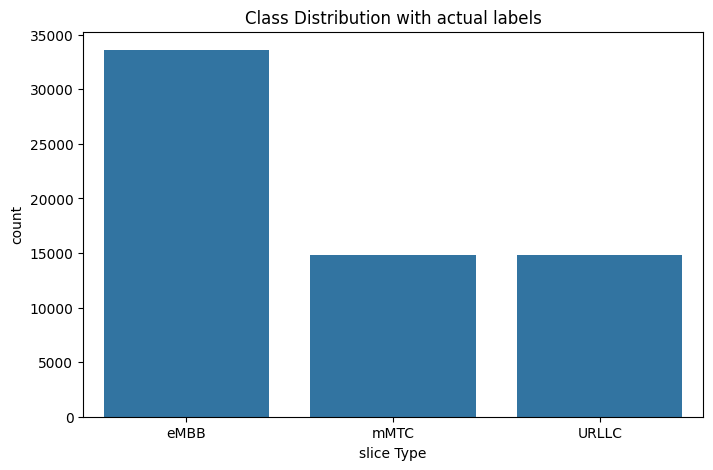

In [19]:
plt.figure(figsize=(8, 5))
sns.countplot(x=data['slice Type'])
plt.title('Class Distribution with actual labels')
plt.show()

#### Heatmaps

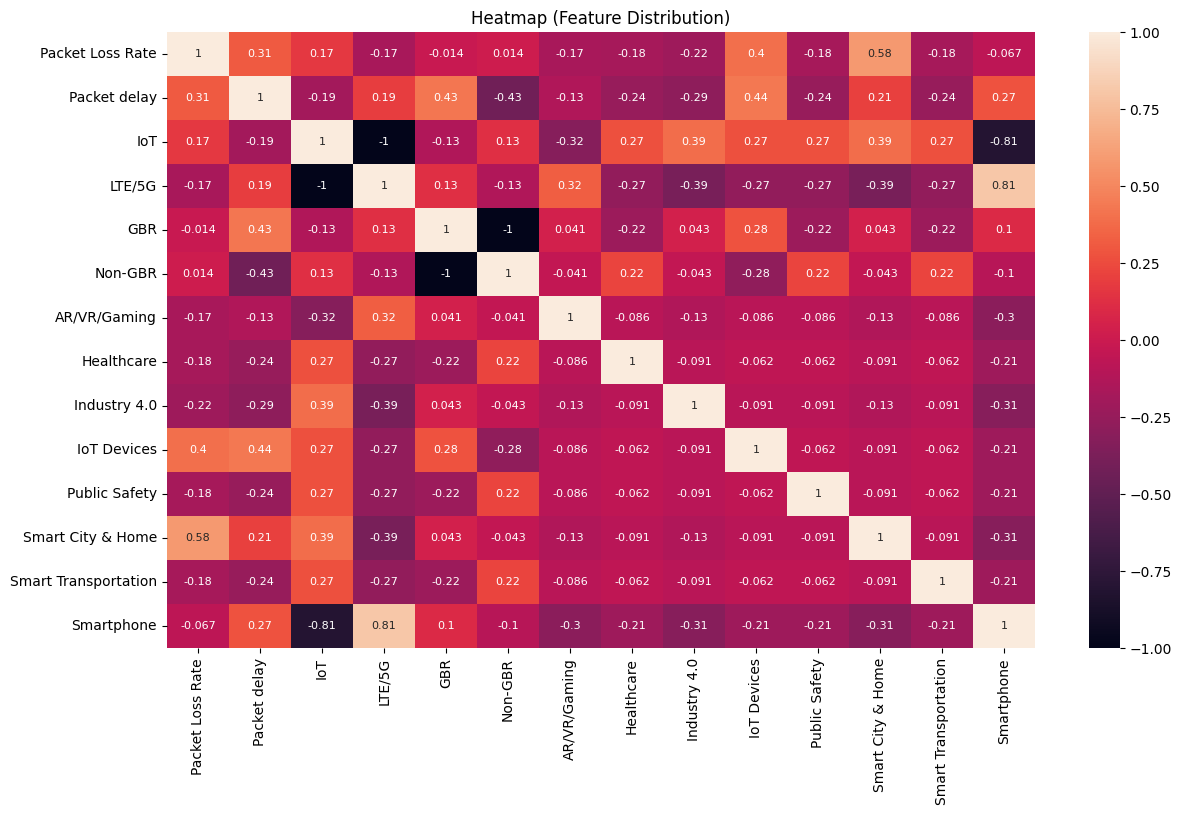

In [20]:
# Create a heatmap for the correlation matrix of all features
plt.figure(figsize=(14, 8))
sns.heatmap(data.iloc[:, :-1].corr(), annot=True, annot_kws={"size": 8})
plt.title('Heatmap (Feature Distribution)')
plt.show()

### **Relevant Feature Selection**

In [21]:
# Select relevant features for clustering (excluding LTE/5g Category and Time)
# X = data.drop(['LTE/5g Category', 'Time'], axis=1)
# features = ['Packet Loss Rate', 'Packet delay', 'IoT',	'LTE/5G',	'GBR',	'Non-GBR', 'AR/VR/Gaming',	'Healthcare',	'Industry 4.0', 'IoT Devices',	'Public Safety',	'Smart City & Home',	'Smart Transportation',	'Smartphone']
features = ['Packet Loss Rate', 'Packet delay', 'IoT',	'LTE/5G',	'GBR',	'Non-GBR']
# features = ['Packet Loss Rate', 'IoT',	'LTE/5G',	'GBR',	'Non-GBR']
# features = ['Packet Loss Rate', 'Packet delay']
# features = ['Packet Loss Rate']

#### Heatmaps

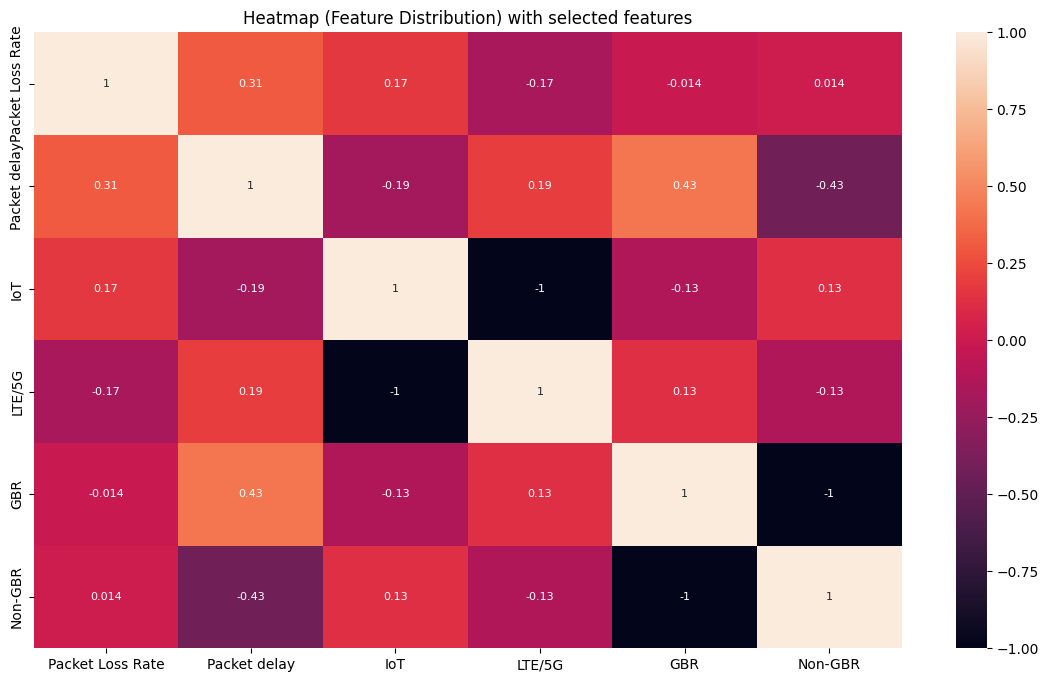

In [22]:
# Create a heatmap for the correlation matrix of all selected features
plt.figure(figsize=(14, 8))
sns.heatmap(data[features].corr(), annot=True, annot_kws={"size": 8})
plt.title('Heatmap (Feature Distribution) with selected features')
plt.show()

In [23]:
end_time_data_preprocessing = time.time()

# **Data Split**

### **Define X and y**

In [24]:
X = data[features]
X

,Packet Loss Rate,Packet delay,IoT,LTE/5G,GBR,Non-GBR
0,0.010000,100,0,1,0,1
1,0.010000,100,0,1,0,1
2,0.010000,100,0,1,0,1
3,0.010000,100,0,1,0,1
4,0.010000,100,0,1,0,1
...,...,...,...,...,...,...
63162,0.000001,10,1,0,0,1
63163,0.000001,10,1,0,0,1
63164,0.000001,10,1,0,0,1
63165,0.000001,10,1,0,0,1


In [25]:
y = data['slice Type']
y

,slice Type
0,eMBB
1,eMBB
2,eMBB
3,eMBB
4,eMBB
...,...
63162,URLLC
63163,URLLC
63164,URLLC
63165,URLLC


### **t-SNE - Dimensionality Reduction**

In [26]:
if tsne == 'yes':
  start_time_tsne = time.time()
  X_backup = X
  X_backup

  tsne = TSNE(n_components=2, random_state=42)  # Reduce to 2 dimensions
  X_tsne = tsne.fit_transform(X)
  X_tsne

  X = pd.DataFrame({'Feature 1': X_tsne[:, 0], 'Feature 2': X_tsne[:, 1]})
  X

  data = pd.DataFrame({'Feature 1': X_tsne[:, 0], 'Feature 2': X_tsne[:, 1], 'slice Type': y})
  data

  features = ['Feature 1', 'Feature 2']
  end_time_tsne = time.time()

In [27]:
# X_backup = X
# X_backup

In [28]:
# tsne = TSNE(n_components=2, random_state=42)  # Reduce to 2 dimensions
# X_tsne = tsne.fit_transform(X)
# X_tsne

In [29]:
# X = pd.DataFrame({'Feature 1': X_tsne[:, 0], 'Feature 2': X_tsne[:, 1]})
# X

#### Pair Plots

In [30]:
# sns.pairplot(X)
# plt.suptitle('Pairwise Scatter Plots', y=1.02)
# plt.show()

In [31]:
# data = pd.DataFrame({'Feature 1': X_tsne[:, 0], 'Feature 2': X_tsne[:, 1], 'slice Type': y})
# data

In [32]:
# features = ['Feature 1', 'Feature 2']

### **Define Training and Testing Dataset**

In [33]:
print(b1)
# print(Z)

42


In [34]:
# Split the dataset into training and testing sets
# X_labelled = X_train
# X_unlabelled = X_test
# y_labelled = y_train
# y_unlabelled = y_test

X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.90, random_state=b1)

In [35]:
X_train

,Feature 1,Feature 2
12038,11.780458,81.808334
54602,132.817749,-111.010040
9061,99.299370,6.755680
36644,132.817749,-111.010040
29003,-139.593002,141.917740
...,...,...
62570,-123.966156,-2.389992
38158,-123.966156,-2.389992
860,13.224804,-124.999298
15795,206.162888,8.662295


In [36]:
X_test

,Feature 1,Feature 2
27189,-139.593002,141.917740
54980,132.817749,-111.010040
22142,-40.638390,193.148438
28289,-139.593002,141.917740
61715,-123.966156,-2.389992
...,...,...
15832,206.162888,8.662295
20831,-40.638390,193.148438
49363,-123.966156,-2.389992
6383,76.639557,189.082611


### **Under Sampling - Class Imbalance Issue**

In [37]:
print(a)

42


Majority Class:  eMBB
Majority Class Count:  30275
Minority Class Count:  13250
Amount of Data to be removed:  17025
Indices to be removed: 
 [21110 26294 48437 19903 38727 41923 47390 16603 17553 26736   789 45498
 56596 49923 17793 23556 17343 20418 50667 45249 31955 16246 18851 26208
 31349 49181 34254  8207 15900 54669 50865 30866 34219 48752 34332 37935
 14551 29371  5339 43393 44478 11959 48846  5138 34155 20555 30453  4269
 26434 49046  3805  6572 34427 19163 24279 34011 12606 31110 21040 13949
 48959 24214   417 12096 53513 44848 56346 27327 34076 15826 47864  2334
 43618 21562 50058  9717 17318 13738 55646 36634 47099 10361 41013 12147
  9415 15027 44424 39720 26443 28233 46881 45952 33810 17263  8892 16841
 22784 17960 18744 51287]


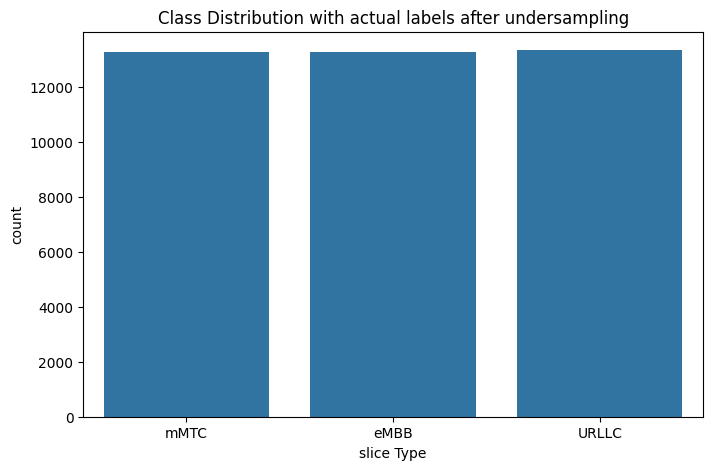

In [38]:
if undersampling == 'yes':
  start_time_undersampling = time.time()
  # Get the column names from the original DataFrame
  X_labelled_column_names = X_train.columns.tolist()
  X_labelled_column_names

  # Convert X_unlabelled to a pandas DataFrame
  X_labelled_df = pd.DataFrame(X_train, columns=X_labelled_column_names)  # Replace X_unlabelled_column_names with your actual column names
  X_labelled_with_labels = X_labelled_df.copy()  # Create a copy to avoid modifying the original DataFrame

  # Resetting indices to avoid alignment issues
  X_labelled_with_labels.reset_index(drop=True, inplace=True)
  y_train.reset_index(drop=True, inplace=True)
  y_labelled = pd.Series(y_train, name='slice Type')  # Convert y_pred to a pandas Series

  # Add y_test and y_pred columns to the DataFrame
  X_labelled_with_labels['slice Type'] = y_train

  X_labelled_with_labels

  # Identify the majority class
  majority_class = X_labelled_with_labels['slice Type'].value_counts().idxmax()
  print("Majority Class: ", majority_class)

  # Count the number of data points in the majority class
  majority_count = X_labelled_with_labels['slice Type'].value_counts()[majority_class]
  print("Majority Class Count: ", majority_count)

  # Count the number of data points in the other two classes
  minority_count = X_labelled_with_labels['slice Type'].value_counts().min()
  print("Minority Class Count: ", minority_count)

  # Calculate the number of data points to remove from the majority class
  num_to_remove = majority_count - minority_count
  print("Amount of Data to be removed: ", num_to_remove)

  # Randomly select data points from the majority class to remove
  majority_indices = X_labelled_with_labels[X_labelled_with_labels['slice Type'] == majority_class].index
  np.random.seed(a)
  remove_indices = np.random.choice(majority_indices, size=num_to_remove, replace=False)
  print("Indices to be removed: \n", remove_indices[:100])

  # Remove the selected data points from the DataFrame
  balanced_data = X_labelled_with_labels.drop(remove_indices)

  balanced_data = balanced_data.reset_index(drop=True)
  balanced_data

  X_train = balanced_data[features]
  X_train

  y_train = balanced_data['slice Type']
  y_train

  end_time_undersampling = time.time()

  plt.figure(figsize=(8, 5))
  sns.countplot(x=balanced_data['slice Type'])
  plt.title('Class Distribution with actual labels after undersampling')
  plt.show()

In [39]:
# # Get the column names from the original DataFrame
# X_labelled_column_names = X_labelled.columns.tolist()
# X_labelled_column_names

In [40]:
# # Convert X_unlabelled to a pandas DataFrame
# X_labelled_df = pd.DataFrame(X_labelled, columns=X_labelled_column_names)  # Replace X_unlabelled_column_names with your actual column names
# X_labelled_with_labels = X_labelled_df.copy()  # Create a copy to avoid modifying the original DataFrame

# # Resetting indices to avoid alignment issues
# X_labelled_with_labels.reset_index(drop=True, inplace=True)
# y_labelled.reset_index(drop=True, inplace=True)
# y_labelled = pd.Series(y_labelled, name='slice Type')  # Convert y_pred to a pandas Series

# # Add y_test and y_pred columns to the DataFrame
# X_labelled_with_labels['slice Type'] = y_labelled

# X_labelled_with_labels

In [41]:
# # Identify the majority class
# majority_class = X_labelled_with_labels['slice Type'].value_counts().idxmax()
# print("Majority Class: ", majority_class)

# # Count the number of data points in the majority class
# majority_count = X_labelled_with_labels['slice Type'].value_counts()[majority_class]
# print("Majority Class Count: ", majority_count)

# # Count the number of data points in the other two classes
# minority_count = X_labelled_with_labels['slice Type'].value_counts().min()
# print("Minority Class Count: ", minority_count)

# # Calculate the number of data points to remove from the majority class
# num_to_remove = majority_count - minority_count
# print("Amount of Data to be removed: ", num_to_remove)

# # Randomly select data points from the majority class to remove
# majority_indices = X_labelled_with_labels[X_labelled_with_labels['slice Type'] == majority_class].index
# np.random.seed(a)
# remove_indices = np.random.choice(majority_indices, size=num_to_remove, replace=False)
# print("Indices to be removed: \n", remove_indices[:100])

# # Remove the selected data points from the DataFrame
# balanced_data = X_labelled_with_labels.drop(remove_indices)

In [42]:
# balanced_data = balanced_data.reset_index(drop=True)
# balanced_data

In [43]:
# plt.figure(figsize=(8, 5))
# sns.countplot(x=balanced_data['slice Type'])
# plt.title('Class Distribution with actual labels after undersampling')
# plt.show()

In [44]:
# plt.figure(figsize=(8, 5))
# sns.countplot(x=balanced_data['slice Type'])
# # plt.title('Balanced Class Distribution with actual labels')
# plt.xlabel('Slice Type')
# plt.ylabel('Data Count')
# plt.show()

In [45]:
# X_labelled = balanced_data[features]
# X_labelled

In [46]:
# y_labelled = balanced_data['slice Type']
# y_labelled

# **Data Imputation**

In [47]:
X_test

,Feature 1,Feature 2
27189,-139.593002,141.917740
54980,132.817749,-111.010040
22142,-40.638390,193.148438
28289,-139.593002,141.917740
61715,-123.966156,-2.389992
...,...,...
15832,206.162888,8.662295
20831,-40.638390,193.148438
49363,-123.966156,-2.389992
6383,76.639557,189.082611


In [48]:
y_test

,slice Type
27189,eMBB
54980,mMTC
22142,eMBB
28289,eMBB
61715,URLLC
...,...
15832,eMBB
20831,eMBB
49363,URLLC
6383,eMBB


In [49]:
# Get the column names from the original DataFrame
# X_test_column_names = X_test.columns.tolist()

# Convert X_test to a pandas DataFrame
# X_test_df = pd.DataFrame(X_test, columns=X_test_column_names)

# Create a copy to avoid modifying the original DataFrame
test_data = X_test.copy()

# Resetting indices to avoid alignment issues
test_data.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)
# y_pred.reset_index(drop=True, inplace=True)

actual_label = pd.Series(y_test, name='actual_label')

# Include the 'predicted labels' as a new column in the DataFrame
test_data['actual_label'] = actual_label
test_data

,Feature 1,Feature 2,actual_label
0,-139.593002,141.917740,eMBB
1,132.817749,-111.010040,mMTC
2,-40.638390,193.148438,eMBB
3,-139.593002,141.917740,eMBB
4,-123.966156,-2.389992,URLLC
...,...,...,...
6312,206.162888,8.662295,eMBB
6313,-40.638390,193.148438,eMBB
6314,-123.966156,-2.389992,URLLC
6315,76.639557,189.082611,eMBB


In [50]:
test_data_eMBB = pd.DataFrame(columns=test_data.columns)
test_data_mMTC = pd.DataFrame(columns=test_data.columns)
test_data_URLLC = pd.DataFrame(columns=test_data.columns)

In [51]:
test_data_eMBB

,Feature 1,Feature 2,actual_label


In [52]:
test_data_mMTC

,Feature 1,Feature 2,actual_label


In [53]:
test_data_URLLC

,Feature 1,Feature 2,actual_label


In [54]:
# Extract 3 dataframes for each slice type
test_data_eMBB = test_data.loc[test_data['actual_label'] == 'eMBB']
test_data_mMTC = test_data.loc[test_data['actual_label'] == 'mMTC']
test_data_URLLC = test_data.loc[test_data['actual_label'] == 'URLLC']

In [55]:
test_data_eMBB

,Feature 1,Feature 2,actual_label
0,-139.593002,141.917740,eMBB
2,-40.638390,193.148438,eMBB
3,-139.593002,141.917740,eMBB
5,150.758942,108.313972,eMBB
6,11.780458,81.808334,eMBB
...,...,...,...
6311,13.224804,-124.999298,eMBB
6312,206.162888,8.662295,eMBB
6313,-40.638390,193.148438,eMBB
6315,76.639557,189.082611,eMBB


In [56]:
print(test_data_eMBB['actual_label'].unique())
if 'Feature 1' in test_data_eMBB.columns:
  print(test_data_eMBB['Feature 1'].unique())
  print(test_data_eMBB['Feature 2'].unique())

['eMBB']
[-139.593      -40.63839    150.75894     11.780458    76.63956
   13.224804    99.29937      6.4958577  206.16289  ]
[ 141.91774   193.14844   108.31397    81.808334  189.08261  -124.9993
    6.75568   -35.45006     8.662295]


In [57]:
if 'Feature 1' in test_data_eMBB.columns:
  print(test_data_eMBB['Feature 1'].min())
  print(test_data_eMBB['Feature 1'].max())
  print(test_data_eMBB['Feature 2'].min())
  print(test_data_eMBB['Feature 2'].max())
else:
  print(test_data_eMBB['Packet Loss Rate'].min())
  print(test_data_eMBB['Packet Loss Rate'].max())
  print(test_data_eMBB['Packet delay'].min())
  print(test_data_eMBB['Packet delay'].max())

-139.593
206.16289
-124.9993
193.14844


In [58]:
test_data_mMTC

,Feature 1,Feature 2,actual_label
1,132.817749,-111.010040,mMTC
13,-11.040947,-217.018219,mMTC
18,-11.040947,-217.018219,mMTC
19,132.817749,-111.010040,mMTC
21,-11.040947,-217.018219,mMTC
...,...,...,...
6299,132.817749,-111.010040,mMTC
6300,132.817749,-111.010040,mMTC
6301,-11.040947,-217.018219,mMTC
6308,132.817749,-111.010040,mMTC


In [59]:
print(test_data_mMTC['actual_label'].unique())
if 'Feature 1' in test_data_mMTC.columns:
  print(test_data_mMTC['Feature 1'].unique())
  print(test_data_mMTC['Feature 2'].unique())

['mMTC']
[ 132.81775   -11.040947 -115.03782 ]
[-111.01004 -217.01822 -147.59734]


In [60]:
if 'Feature 1' in test_data_mMTC.columns:
  print(test_data_mMTC['Feature 1'].min())
  print(test_data_mMTC['Feature 1'].max())
  print(test_data_mMTC['Feature 2'].min())
  print(test_data_mMTC['Feature 2'].max())
else:
  print(test_data_mMTC['Packet Loss Rate'].min())
  print(test_data_mMTC['Packet Loss Rate'].max())
  print(test_data_mMTC['Packet delay'].min())
  print(test_data_mMTC['Packet delay'].max())

-115.03782
132.81775
-217.01822
-111.01004


In [61]:
test_data_URLLC

,Feature 1,Feature 2,actual_label
4,-123.966156,-2.389992,URLLC
8,-123.966156,-2.389992,URLLC
10,-123.966156,-2.389992,URLLC
12,-123.966156,-2.389992,URLLC
29,-123.966156,-2.389992,URLLC
...,...,...,...
6304,-123.966156,-2.389992,URLLC
6305,-123.966156,-2.389992,URLLC
6307,-123.966156,-2.389992,URLLC
6309,-123.966156,-2.389992,URLLC


In [62]:
print(test_data_URLLC['actual_label'].unique())
if 'Feature 1' in test_data_URLLC.columns:
  print(test_data_URLLC['Feature 1'].unique())
  print(test_data_URLLC['Feature 2'].unique())

['URLLC']
[-123.966156]
[-2.3899918]


In [63]:
if 'Feature 1' in test_data_URLLC.columns:
  print(test_data_URLLC['Feature 1'].min())
  print(test_data_URLLC['Feature 1'].max())
  print(test_data_URLLC['Feature 2'].min())
  print(test_data_URLLC['Feature 2'].max())
else:
  print(test_data_URLLC['Packet Loss Rate'].min())
  print(test_data_URLLC['Packet Loss Rate'].max())
  print(test_data_URLLC['Packet delay'].min())
  print(test_data_URLLC['Packet delay'].max())

-123.966156
-123.966156
-2.3899918
-2.3899918


In [64]:
test_data_eMBB_new = pd.DataFrame(columns=test_data_eMBB.columns)
# test_data_eMBB_new.drop('actual_label', axis=1, inplace=True)
test_data_eMBB_new

,Feature 1,Feature 2,actual_label


In [65]:
test_data_mMTC_new = pd.DataFrame(columns=test_data_mMTC.columns)
# test_data_mMTC_new.drop('actual_label', axis=1, inplace=True)
test_data_mMTC_new

,Feature 1,Feature 2,actual_label


In [66]:
test_data_URLLC_new = pd.DataFrame(columns=test_data_URLLC.columns)
# test_data_URLLC_new.drop('actual_label', axis=1, inplace=True)
test_data_URLLC_new

,Feature 1,Feature 2,actual_label


In [67]:
# for i in range(1000):
#   iot = random.randint(0,1)
#   lte_5g = 1 - iot

#   gbr = random.randint(0,1)
#   non_gbr = 1 - gbr

#   test_data_eMBB_new.loc[i] = [random.uniform(test_data_eMBB['Packet Loss Rate'].min(), test_data_eMBB['Packet Loss Rate'].max()), random.uniform(test_data_eMBB['Packet delay'].min(), test_data_eMBB['Packet delay'].max()), iot, lte_5g, gbr, non_gbr, 'eMBB']  # Adding a new row to eMBB
#   test_data_mMTC_new.loc[i] = [random.uniform(test_data_URLLC['Packet Loss Rate'].min(), test_data_URLLC['Packet Loss Rate'].max()), random.uniform(test_data_URLLC['Packet delay'].min(), test_data_URLLC['Packet delay'].max()), iot, lte_5g, gbr, non_gbr, 'mMTC']  # Adding a new row to mMTC
#   test_data_URLLC_new.loc[i] = [random.uniform(test_data_URLLC['Packet Loss Rate'].min(), test_data_URLLC['Packet Loss Rate'].max()), random.uniform(test_data_URLLC['Packet delay'].min(), test_data_URLLC['Packet delay'].max()), iot, lte_5g, gbr, non_gbr, 'URLLC']  # Adding a new row to URLLC


In [ ]:
for i in range(1000):
  if 'Feature 1' in test_data_eMBB_new.columns:
      test_data_eMBB_new.loc[i] = [random.choice(test_data_eMBB['Feature 1'].unique()), random.choice(test_data_eMBB['Feature 2'].unique()),'eMBB']  # Adding a new row to eMBB
      test_data_mMTC_new.loc[i] = [random.choice(test_data_mMTC['Feature 1'].unique()), random.choice(test_data_mMTC['Feature 2'].unique()), 'mMTC']  # Adding a new row to mMTC
      test_data_URLLC_new.loc[i] = [random.choice(test_data_URLLC['Feature 1'].unique()), random.choice(test_data_URLLC['Feature 2'].unique()), 'URLLC']  # Adding a new row to URLLC

  elif 'Packet Loss Rate' in test_data_eMBB_new.columns:
      iot = random.randint(0, 1)
      lte_5g = 1 - iot

      gbr = random.randint(0, 1)
      non_gbr = 1 - gbr

      test_data_eMBB_new.loc[i] = [random.uniform(test_data_eMBB['Packet Loss Rate'].min(), test_data_eMBB['Packet Loss Rate'].max()), random.uniform(test_data_eMBB['Packet delay'].min(), test_data_eMBB['Packet delay'].max()), iot, lte_5g, gbr, non_gbr, 'eMBB']  # Adding a new row to eMBB
      test_data_mMTC_new.loc[i] = [random.uniform(test_data_mMTC['Packet Loss Rate'].min(), test_data_mMTC['Packet Loss Rate'].max()), random.uniform(test_data_mMTC['Packet delay'].min(), test_data_mMTC['Packet delay'].max()), iot, lte_5g, gbr, non_gbr, 'mMTC']  # Adding a new row to mMTC
      test_data_URLLC_new.loc[i] = [random.uniform(test_data_URLLC['Packet Loss Rate'].min(), test_data_URLLC['Packet Loss Rate'].max()), random.uniform(test_data_URLLC['Packet delay'].min(), test_data_URLLC['Packet delay'].max()), iot, lte_5g, gbr, non_gbr, 'URLLC']  # Adding a new row to URLLC

  else:
    print("ERROR")


In [ ]:
test_data_eMBB_new

In [ ]:
test_data_mMTC_new

In [ ]:
test_data_URLLC_new

In [ ]:
test_data_new = pd.DataFrame(columns=X_test.columns)
test_data_new

In [ ]:
# Concatenate the DataFrames
test_data_new = pd.concat([test_data_eMBB_new, test_data_mMTC_new, test_data_URLLC_new], ignore_index=True)
test_data_new

In [ ]:
# Ensure that the specific columns are of type integer
if 'Feature 1' not in test_data_new.columns:
  test_data_new['IoT'] = test_data_new['IoT'].astype(int)
  test_data_new['LTE/5G'] = test_data_new['LTE/5G'].astype(int)
  test_data_new['GBR'] = test_data_new['GBR'].astype(int)
  test_data_new['Non-GBR'] = test_data_new['Non-GBR'].astype(int)
  test_data_new.reset_index(drop=True, inplace=True)
  test_data_new

In [ ]:
X_test_new = test_data_new[features]
X_test_new

In [ ]:
y_test_new = test_data_new['actual_label']
y_test_new

In [ ]:
X_test = X_test_new
y_test = y_test_new

In [ ]:
X_test

In [ ]:
y_test

# **RANDOM FOREST CLASSIFIER**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
model_RFC = RandomForestClassifier()
model_RFC.fit(X_train, y_train)

In [ ]:
y_pred_RFC = model_RFC.predict(X_test)

In [ ]:
accuracy_RFC = accuracy_score(y_test, y_pred_RFC)
print(f"Accuracy: {accuracy_RFC:.2f}")

precision_RFC = precision_score(y_test, y_pred_RFC, average='weighted')
print(f"Precision: {precision_RFC:.2f}")

recall_RFC = recall_score(y_test, y_pred_RFC, average='weighted')
print(f"Recall: {recall_RFC:.2f}")

f1score_RFC = f1_score(y_test, y_pred_RFC, average='weighted')
print(f"F1-score: {f1score_RFC:.2f}")

In [ ]:
print(classification_report(y_test, y_pred_RFC))

In [ ]:
print(confusion_matrix(y_test, y_pred_RFC))

In [ ]:
# Feature Importance
feature_importance = model_RFC.feature_importances_
# features = np.arange(len(feature_importance))

plt.figure(figsize=(2 * len(features), 6))
plt.bar(features, feature_importance)
plt.title('Feature Importance')
plt.xlabel('Feature Name')
plt.ylabel('Importance Score')
plt.show()

In [ ]:
# Confusion Matrix
cm_RFC = confusion_matrix(y_test, y_pred_RFC)
plt.figure(figsize=(3, 2))
sns.heatmap(cm_RFC, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title('Confusion Matrix for RFC')
plt.xlabel('Predicted Slice Type')
plt.ylabel('Actual Slice Type')

# # Add a legend to indicate class labels
# classes = np.unique(y)
# plt.xticks(np.arange(len(classes)) + 0.5, classes, rotation=45)
# plt.yticks(np.arange(len(classes)) + 0.5, classes, rotation=0)

plt.show()

In [ ]:
# Get the column names from the original DataFrame
X_test_column_names = X.columns.tolist()

# Convert X_test to a pandas DataFrame
X_test_df_RFC = pd.DataFrame(X_test, columns=X_test_column_names)  # Replace X_test_column_names with your actual column names
X_test_with_predictions_RFC = X_test_df_RFC.copy()  # Create a copy to avoid modifying the original DataFrame

# Resetting indices to avoid alignment issues
X_test_with_predictions_RFC.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)
y_pred_RFC = pd.Series(y_pred_RFC, name='Predicted_Slice_Type')  # Convert y_pred to a pandas Series

# Add y_test and y_pred columns to the DataFrame
X_test_with_predictions_RFC['Actual_Slice_Type'] = y_test
X_test_with_predictions_RFC['Predicted_Slice_Type'] = y_pred_RFC

In [ ]:
X_test_column_names

In [ ]:
X_test_with_predictions_RFC.head(20)

In [ ]:
# Precision-Recall Curve for Multi-Class

# Binarize the labels
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
y_pred_RFC_bin = label_binarize(y_pred_RFC, classes=np.unique(y_pred_RFC))

# Calculate precision-recall curve
precision = dict()
recall = dict()
average_precision = dict()

# Loop over each class
for i in range(len(np.unique(y_test))):
    precision[i], recall[i], _ = precision_recall_curve(y_test_bin[:, i], y_pred_RFC_bin[:, i])
    average_precision[i] = average_precision_score(y_test_bin[:, i], y_pred_RFC_bin[:, i])

# Compute micro-average precision-recall curve and its average precision
precision["micro"], recall["micro"], _ = precision_recall_curve(y_test_bin.ravel(), y_pred_RFC_bin.ravel())
average_precision["micro"] = average_precision_score(y_test_bin, y_pred_RFC_bin, average="micro")

# Plot micro-average Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.step(recall['micro'], precision['micro'], color='b', alpha=0.2, where='post')
plt.fill_between(recall["micro"], precision["micro"], step='post', alpha=0.2, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title(f'Micro-average Precision-Recall Curve (Average Precision = {average_precision["micro"]:.2f})')
plt.show()

In [ ]:
# ROC Curve for Multi-Class

# Binarize the labels
# y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
# y_pred_RFC_bin = label_binarize(y_pred_RFC, classes=np.unique(y_pred_RFC))

# Calculate ROC curve
fpr = dict()
tpr = dict()
roc_auc = dict()

# Loop over each class
for i in range(len(np.unique(y_test))):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_RFC_bin[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and its AUC
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), y_pred_RFC_bin.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot micro-average ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr['micro'], tpr['micro'], color='darkorange', lw=2, label=f'Micro-average ROC Curve (AUC = {roc_auc["micro"]:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

# **Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
model_LR = LogisticRegression()
model_LR.fit(X_train, y_train)

In [ ]:
y_pred_LR = model_LR.predict(X_test)

In [ ]:
accuracy_LR = accuracy_score(y_test, y_pred_LR)
print(f'Accuracy: {accuracy_LR}')

In [ ]:
accuracy_LR = accuracy_score(y_test, y_pred_LR)
print(f"Accuracy: {accuracy_LR:.2f}")

precision_LR = precision_score(y_test, y_pred_LR, average='weighted')
print(f"Precision: {precision_LR:.2f}")

recall_LR = recall_score(y_test, y_pred_LR, average='weighted')
print(f"Recall: {recall_LR:.2f}")

f1score_LR = f1_score(y_test, y_pred_LR, average='weighted')
print(f"F1-score: {f1score_LR:.2f}")

In [ ]:
print(classification_report(y_test, y_pred_LR))

In [ ]:
print(confusion_matrix(y_test, y_pred_LR))

In [ ]:
# Feature Importance
feature_importance = model_LR.coef_[0]
# features = np.arange(len(feature_importance))

plt.figure(figsize=(2 * len(features), 6))
plt.bar(features, feature_importance)
plt.title('Feature Importance')
plt.xlabel('Feature Name')
plt.ylabel('Coefficient Value')
plt.show()

In [ ]:
# Confusion Matrix
cm_LR = confusion_matrix(y_test, y_pred_LR)
plt.figure(figsize=(10, 8))
sns.heatmap(cm_LR, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title('Confusion Matrix for Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('True')

# # Add a legend to indicate class labels
# classes = np.unique(y)
# plt.xticks(np.arange(len(classes)) + 0.5, classes, rotation=45)
# plt.yticks(np.arange(len(classes)) + 0.5, classes, rotation=0)

plt.show()

In [ ]:
# Get the column names from the original DataFrame
X_test_column_names = X.columns.tolist()

# Convert X_test to a pandas DataFrame
X_test_df_LR = pd.DataFrame(X_test, columns=X_test_column_names)  # Replace X_test_column_names with your actual column names
X_test_with_predictions_LR = X_test_df_LR.copy()  # Create a copy to avoid modifying the original DataFrame

# Resetting indices to avoid alignment issues
X_test_with_predictions_LR.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)
y_pred_LR = pd.Series(y_pred_LR, name='Predicted_Slice_Type')  # Convert y_pred to a pandas Series

# Add y_test and y_pred columns to the DataFrame
X_test_with_predictions_LR['Actual_Slice_Type'] = y_test
X_test_with_predictions_LR['Predicted_Slice_Type'] = y_pred_LR

In [ ]:
X_test_with_predictions_LR.head(20)

In [ ]:
# Precision-Recall Curve for Multi-Class

# Binarize the labels
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
y_pred_LR_bin = label_binarize(y_pred_LR, classes=np.unique(y_pred_LR))

# Calculate precision-recall curve
precision = dict()
recall = dict()
average_precision = dict()

# Loop over each class
for i in range(len(np.unique(y_test))):
    precision[i], recall[i], _ = precision_recall_curve(y_test_bin[:, i], y_pred_LR_bin[:, i])
    average_precision[i] = average_precision_score(y_test_bin[:, i], y_pred_LR_bin[:, i])

# Compute micro-average precision-recall curve and its average precision
precision["micro"], recall["micro"], _ = precision_recall_curve(y_test_bin.ravel(), y_pred_LR_bin.ravel())
average_precision["micro"] = average_precision_score(y_test_bin, y_pred_LR_bin, average="micro")

# Plot micro-average Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.step(recall['micro'], precision['micro'], color='b', alpha=0.2, where='post')
plt.fill_between(recall["micro"], precision["micro"], step='post', alpha=0.2, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title(f'Micro-average Precision-Recall Curve (Average Precision = {average_precision["micro"]:.2f})')
plt.show()

In [ ]:
# ROC Curve for Multi-Class

# Binarize the labels
# y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
# y_pred_LR_bin = label_binarize(y_pred_LR, classes=np.unique(y_pred_LR))

# Calculate ROC curve
fpr = dict()
tpr = dict()
roc_auc = dict()

# Loop over each class
for i in range(len(np.unique(y_test))):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_LR_bin[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and its AUC
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), y_pred_LR_bin.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot micro-average ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr['micro'], tpr['micro'], color='darkorange', lw=2, label=f'Micro-average ROC Curve (AUC = {roc_auc["micro"]:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

# **Naive Bayes**

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
model_NB = GaussianNB()
model_NB.fit(X_train, y_train)

In [ ]:
y_pred_NB = model_NB.predict(X_test)

In [ ]:
accuracy_NB = accuracy_score(y_test, y_pred_NB)
print(f'Accuracy: {accuracy_NB}')

In [ ]:
print(classification_report(y_test, y_pred_NB))

In [ ]:
print(confusion_matrix(y_test, y_pred_NB))

In [ ]:
# Confusion Matrix
cm_NB = confusion_matrix(y_test, y_pred_NB)
plt.figure(figsize=(10, 8))
sns.heatmap(cm_NB, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title('Confusion Matrix for Naive Bayes')
plt.xlabel('Predicted')
plt.ylabel('True')

# # Add a legend to indicate class labels
# classes = np.unique(y)
# plt.xticks(np.arange(len(classes)) + 0.5, classes, rotation=45)
# plt.yticks(np.arange(len(classes)) + 0.5, classes, rotation=0)

plt.show()

In [ ]:
# Get the column names from the original DataFrame
X_test_column_names = X.columns.tolist()

# Convert X_test to a pandas DataFrame
X_test_df_NB = pd.DataFrame(X_test, columns=X_test_column_names)  # Replace X_test_column_names with your actual column names
X_test_with_predictions_NB = X_test_df_NB.copy()  # Create a copy to avoid modifying the original DataFrame

# Resetting indices to avoid alignment issues
X_test_with_predictions_NB.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)
y_pred_NB = pd.Series(y_pred_NB, name='Predicted_Slice_Type')  # Convert y_pred to a pandas Series

# Add y_test and y_pred columns to the DataFrame
X_test_with_predictions_NB['Actual_Slice_Type'] = y_test
X_test_with_predictions_NB['Predicted_Slice_Type'] = y_pred_NB

In [ ]:
X_test_with_predictions_NB.head(20)

In [ ]:
# Precision-Recall Curve for Multi-Class

# Binarize the labels
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
y_pred_NB_bin = label_binarize(y_pred_NB, classes=np.unique(y_pred_NB))

# Calculate precision-recall curve
precision = dict()
recall = dict()
average_precision = dict()

# Loop over each class
for i in range(len(np.unique(y_test))):
    precision[i], recall[i], _ = precision_recall_curve(y_test_bin[:, i], y_pred_NB_bin[:, i])
    average_precision[i] = average_precision_score(y_test_bin[:, i], y_pred_NB_bin[:, i])

# Compute micro-average precision-recall curve and its average precision
precision["micro"], recall["micro"], _ = precision_recall_curve(y_test_bin.ravel(), y_pred_NB_bin.ravel())
average_precision["micro"] = average_precision_score(y_test_bin, y_pred_NB_bin, average="micro")

# Plot micro-average Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.step(recall['micro'], precision['micro'], color='b', alpha=0.2, where='post')
plt.fill_between(recall["micro"], precision["micro"], step='post', alpha=0.2, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title(f'Micro-average Precision-Recall Curve (Average Precision = {average_precision["micro"]:.2f})')
plt.show()

In [ ]:
# ROC Curve for Multi-Class

# Binarize the labels
# y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
# y_pred_NB_bin = label_binarize(y_pred_NB, classes=np.unique(y_pred_NB))

# Calculate ROC curve
fpr = dict()
tpr = dict()
roc_auc = dict()

# Loop over each class
for i in range(len(np.unique(y_test))):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_NB_bin[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and its AUC
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), y_pred_NB_bin.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot micro-average ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr['micro'], tpr['micro'], color='darkorange', lw=2, label=f'Micro-average ROC Curve (AUC = {roc_auc["micro"]:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

# **KNN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# Choose the number of neighbors (e.g., 3, 5, 7)
k = 5
model_KNN = KNeighborsClassifier(n_neighbors=k)
model_KNN.fit(X_train, y_train)

In [ ]:
y_pred_KNN = model_KNN.predict(X_test)

In [ ]:
accuracy_KNN = accuracy_score(y_test, y_pred_KNN)
print(f'Accuracy: {accuracy_KNN}')

In [ ]:
print(classification_report(y_test, y_pred_KNN))

In [ ]:
print(confusion_matrix(y_test, y_pred_KNN))

In [ ]:
# Confusion Matrix
cm_KNN = confusion_matrix(y_test, y_pred_KNN)
plt.figure(figsize=(10, 8))
sns.heatmap(cm_KNN, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title('Confusion Matrix for K Nearest Neighbour')
plt.xlabel('Predicted')
plt.ylabel('True')

# # Add a legend to indicate class labels
# classes = np.unique(y)
# plt.xticks(np.arange(len(classes)) + 0.5, classes, rotation=45)
# plt.yticks(np.arange(len(classes)) + 0.5, classes, rotation=0)

plt.show()

In [ ]:
# Get the column names from the original DataFrame
X_test_column_names = X.columns.tolist()

# Convert X_test to a pandas DataFrame
X_test_df_KNN = pd.DataFrame(X_test, columns=X_test_column_names)  # Replace X_test_column_names with your actual column names
X_test_with_predictions_KNN = X_test_df_KNN.copy()  # Create a copy to avoid modifying the original DataFrame

# Resetting indices to avoid alignment issues
X_test_with_predictions_KNN.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)
y_pred_KNN = pd.Series(y_pred_KNN, name='Predicted_Slice_Type')  # Convert y_pred to a pandas Series

# Add y_test and y_pred columns to the DataFrame
X_test_with_predictions_KNN['Actual_Slice_Type'] = y_test
X_test_with_predictions_KNN['Predicted_Slice_Type'] = y_pred_KNN

In [ ]:
X_test_with_predictions_KNN.head(20)

In [ ]:
# Precision-Recall Curve for Multi-Class

# Binarize the labels
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
y_pred_KNN_bin = label_binarize(y_pred_KNN, classes=np.unique(y_pred_KNN))

# Calculate precision-recall curve
precision = dict()
recall = dict()
average_precision = dict()

# Loop over each class
for i in range(len(np.unique(y_test))):
    precision[i], recall[i], _ = precision_recall_curve(y_test_bin[:, i], y_pred_KNN_bin[:, i])
    average_precision[i] = average_precision_score(y_test_bin[:, i], y_pred_KNN_bin[:, i])

# Compute micro-average precision-recall curve and its average precision
precision["micro"], recall["micro"], _ = precision_recall_curve(y_test_bin.ravel(), y_pred_KNN_bin.ravel())
average_precision["micro"] = average_precision_score(y_test_bin, y_pred_KNN_bin, average="micro")

# Plot micro-average Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.step(recall['micro'], precision['micro'], color='b', alpha=0.2, where='post')
plt.fill_between(recall["micro"], precision["micro"], step='post', alpha=0.2, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title(f'Micro-average Precision-Recall Curve (Average Precision = {average_precision["micro"]:.2f})')
plt.show()

In [ ]:
# ROC Curve for Multi-Class

# Binarize the labels
# y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
# y_pred_KNN_bin = label_binarize(y_pred_KNN, classes=np.unique(y_pred_KNN))

# Calculate ROC curve
fpr = dict()
tpr = dict()
roc_auc = dict()

# Loop over each class
for i in range(len(np.unique(y_test))):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_KNN_bin[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and its AUC
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), y_pred_KNN_bin.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot micro-average ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr['micro'], tpr['micro'], color='darkorange', lw=2, label=f'Micro-average ROC Curve (AUC = {roc_auc["micro"]:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

# **Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
model_DT = DecisionTreeClassifier(random_state=42)
model_DT.fit(X_train, y_train)

In [ ]:
y_pred_DT = model_DT.predict(X_test)

In [ ]:
accuracy_DT = accuracy_score(y_test, y_pred_DT)
print(f'Accuracy: {accuracy_DT}')

In [ ]:
print(classification_report(y_test, y_pred_DT))

In [ ]:
print(confusion_matrix(y_test, y_pred_DT))

In [ ]:
# Feature Importance
feature_importance = model_DT.feature_importances_
# features = np.arange(len(feature_importance))

plt.figure(figsize=(2 * len(features), 6))
plt.bar(features, feature_importance)
plt.title('Feature Importance')
plt.xlabel('Feature Index')
plt.ylabel('Importance Score')
plt.show()

In [ ]:
# Confusion Matrix
cm_DT = confusion_matrix(y_test, y_pred_DT)
plt.figure(figsize=(10, 8))
sns.heatmap(cm_DT, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title('Confusion Matrix for Decision Tree')
plt.xlabel('Predicted')
plt.ylabel('True')

# # Add a legend to indicate class labels
# classes = np.unique(y)
# plt.xticks(np.arange(len(classes)) + 0.5, classes, rotation=45)
# plt.yticks(np.arange(len(classes)) + 0.5, classes, rotation=0)

plt.show()

In [ ]:
# Get the column names from the original DataFrame
X_test_column_names = X.columns.tolist()

# Convert X_test to a pandas DataFrame
X_test_df_DT = pd.DataFrame(X_test, columns=X_test_column_names)  # Replace X_test_column_names with your actual column names
X_test_with_predictions_DT = X_test_df_DT.copy()  # Create a copy to avoid modifying the original DataFrame

# Resetting indices to avoid alignment issues
X_test_with_predictions_DT.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)
y_pred_DT = pd.Series(y_pred_DT, name='Predicted_Slice_Type')  # Convert y_pred to a pandas Series

# Add y_test and y_pred columns to the DataFrame
X_test_with_predictions_DT['Actual_Slice_Type'] = y_test
X_test_with_predictions_DT['Predicted_Slice_Type'] = y_pred_DT

In [ ]:
X_test_with_predictions_DT.head(20)

In [ ]:
# Precision-Recall Curve for Multi-Class

# Binarize the labels
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
y_pred_DT_bin = label_binarize(y_pred_DT, classes=np.unique(y_pred_DT))

# Calculate precision-recall curve
precision = dict()
recall = dict()
average_precision = dict()

# Loop over each class
for i in range(len(np.unique(y_test))):
    precision[i], recall[i], _ = precision_recall_curve(y_test_bin[:, i], y_pred_DT_bin[:, i])
    average_precision[i] = average_precision_score(y_test_bin[:, i], y_pred_DT_bin[:, i])

# Compute micro-average precision-recall curve and its average precision
precision["micro"], recall["micro"], _ = precision_recall_curve(y_test_bin.ravel(), y_pred_DT_bin.ravel())
average_precision["micro"] = average_precision_score(y_test_bin, y_pred_DT_bin, average="micro")

# Plot micro-average Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.step(recall['micro'], precision['micro'], color='b', alpha=0.2, where='post')
plt.fill_between(recall["micro"], precision["micro"], step='post', alpha=0.2, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title(f'Micro-average Precision-Recall Curve (Average Precision = {average_precision["micro"]:.2f})')
plt.show()

In [ ]:
# ROC Curve for Multi-Class

# Binarize the labels
# y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
# y_pred_DT_bin = label_binarize(y_pred_DT, classes=np.unique(y_pred_DT))

# Calculate ROC curve
fpr = dict()
tpr = dict()
roc_auc = dict()

# Loop over each class
for i in range(len(np.unique(y_test))):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_DT_bin[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and its AUC
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), y_pred_DT_bin.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot micro-average ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr['micro'], tpr['micro'], color='darkorange', lw=2, label=f'Micro-average ROC Curve (AUC = {roc_auc["micro"]:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

# **Support Vector Machine**

In [ ]:
from sklearn.svm import SVC

In [ ]:
# Types of SVM (linear, polynomial, radial basis function, etc.)
# Here, we use a linear kernel for simplicity
model_SVM = SVC(kernel='linear')
model_SVM.fit(X_train, y_train)

In [ ]:
y_pred_SVM = model_SVM.predict(X_test)

In [ ]:
accuracy_SVM = accuracy_score(y_test, y_pred_SVM)
print(f'Accuracy: {accuracy_SVM}')

In [ ]:
print(classification_report(y_test, y_pred_SVM))

In [ ]:
print(confusion_matrix(y_test, y_pred_SVM))

In [ ]:
# Confusion Matrix
cm_SVM = confusion_matrix(y_test, y_pred_SVM)
plt.figure(figsize=(10, 8))
sns.heatmap(cm_SVM, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title('Confusion Matrix for Support Vector Machine')
plt.xlabel('Predicted')
plt.ylabel('True')

# # Add a legend to indicate class labels
# classes = np.unique(y)
# plt.xticks(np.arange(len(classes)) + 0.5, classes, rotation=45)
# plt.yticks(np.arange(len(classes)) + 0.5, classes, rotation=0)

plt.show()

In [ ]:
# Get the column names from the original DataFrame
X_test_column_names = X.columns.tolist()

# Convert X_test to a pandas DataFrame
X_test_df_SVM = pd.DataFrame(X_test, columns=X_test_column_names)  # Replace X_test_column_names with your actual column names
X_test_with_predictions_SVM = X_test_df_SVM.copy()  # Create a copy to avoid modifying the original DataFrame

# Resetting indices to avoid alignment issues
X_test_with_predictions_SVM.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)
y_pred = pd.Series(y_pred_SVM, name='Predicted_Slice_Type')  # Convert y_pred to a pandas Series

# Add y_test and y_pred columns to the DataFrame
X_test_with_predictions_SVM['Actual_Slice_Type'] = y_test
X_test_with_predictions_SVM['Predicted_Slice_Type'] = y_pred_SVM

In [ ]:
X_test_with_predictions_SVM.head(20)

In [ ]:
# Precision-Recall Curve for Multi-Class

# Binarize the labels
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
y_pred_SVM_bin = label_binarize(y_pred_SVM, classes=np.unique(y_pred_SVM))

# Calculate precision-recall curve
precision = dict()
recall = dict()
average_precision = dict()

# Loop over each class
for i in range(len(np.unique(y_test))):
    precision[i], recall[i], _ = precision_recall_curve(y_test_bin[:, i], y_pred_SVM_bin[:, i])
    average_precision[i] = average_precision_score(y_test_bin[:, i], y_pred_SVM_bin[:, i])

# Compute micro-average precision-recall curve and its average precision
precision["micro"], recall["micro"], _ = precision_recall_curve(y_test_bin.ravel(), y_pred_SVM_bin.ravel())
average_precision["micro"] = average_precision_score(y_test_bin, y_pred_SVM_bin, average="micro")

# Plot micro-average Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.step(recall['micro'], precision['micro'], color='b', alpha=0.2, where='post')
plt.fill_between(recall["micro"], precision["micro"], step='post', alpha=0.2, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title(f'Micro-average Precision-Recall Curve (Average Precision = {average_precision["micro"]:.2f})')
plt.show()

In [ ]:
# ROC Curve for Multi-Class

# Binarize the labels
# y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
# y_pred_SVM_bin = label_binarize(y_pred_SVM, classes=np.unique(y_pred_SVM))

# Calculate ROC curve
fpr = dict()
tpr = dict()
roc_auc = dict()

# Loop over each class
for i in range(len(np.unique(y_test))):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_SVM_bin[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and its AUC
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), y_pred_SVM_bin.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot micro-average ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr['micro'], tpr['micro'], color='darkorange', lw=2, label=f'Micro-average ROC Curve (AUC = {roc_auc["micro"]:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

# **SYNC NOTEBOOKS**

In [ ]:
%cp '/content/drive/MyDrive/Colab Notebooks/Exp1 - Slice_Classification_SupML_Data_Imputation.ipynb' '/content/drive/MyDrive/Network_Slicing_with_ML_repo/Network-Slicing-with-ML/Notebooks/'